In [1]:
#Импортирования необходимых библоитек 
import pandas as pd 
import numpy as np
from numpy import asarray
from pathlib import Path
import cv2, pickle, csv, os, sys, re
from PIL import Image, ImageOps
from tools import *
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras import optimizers, regularizers
from tensorflow import keras
import tensorflow as tf
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
#  Проверка данных о ресурсах системы
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [2]:
# Чтение таблицы ключевых точек и директории изображении. Указать путь к CSV файлу и изображениям.
csv_file_path = Path(r"C:\Training_Project300x200\Training_Project_dataset.csv")
images_dirname = Path(r"C:\Training_Project300x200\colored")

# Получения основных данных
SHAPE, last_image_index, curr_img_count, current_wd, keypoints_df, sorted_images, images_count_initail_state, csv_initial_state = get_main_data(csv_file_path, images_dirname, True)

In [ ]:
# Проверка. Просмотр заглавления таблицы
keypoints_df.head()

In [ ]:
# Просмотр одного изображения по номеру(индексу)         
plot_cow(Path(os.path.join(images_dirname, sorted_images[0])))

In [ ]:
# Просмотр изображении с аннотациями по номеру(индексу)
show_cowannot(0, keypoints_df, images_dirname, sorted_images)

In [ ]:
#                             !!! УВЕЛИЧЕНИЕ ДАННЫХ !!!

In [ ]:
# Каскад увеличения данных 
data_augment = [
    
#     FlipImages(), 
#     MirrorImages(),
#     MirrorFlipImages(),
    
#     RotateImages(5),
#     RotateImages(-5),
#     RotateImages(10),
#     RotateImages(-10),
#     RotateImages(15),
#     RotateImages(-15),
#     RotateImages(20),
#     RotateImages(-20),
#     RotateImages(30),
#     RotateImages(-30),
#     ShiftImages(10, 10),
#     ShiftImages(-10, -10),
#     ShiftImages(10, -10),
#     ShiftImages(-10, 10),   
    
#     BlurImages(5),
#     BlurImages(11),
#     NoiseImages(0.3),
#     NoiseImages(0.1),
#     ContrastImages(1.5),
#     ContrastImages(1.1),    
#     SaturationImages(1.5),
#     BrightenImages(1.5), 
#     SaturationImages(1.1),
#     BrightenImages(1.1), 

]
AugmentApply(data_augment, SHAPE, last_image_index, curr_img_count, current_wd, keypoints_df, sorted_images, images_dirname, csv_file_path, images_count_initail_state, csv_initial_state); SHAPE, last_image_index, curr_img_count, current_wd, keypoints_df, sorted_images = get_main_data(csv_file_path, images_dirname, False)

In [ ]:
# Просмотр изображении с аннотациями по номеру(индексу)
show_cowannot(0, keypoints_df, images_dirname, sorted_images)

In [ ]:
#                            !!! ЧАСТЬ МАШИННОГО ОБУЧЕНИЯ !!!

In [3]:
# Подготовка данных (уже писали)
if SHAPE[2] == 3:
    X = np.stack([string2image(Path(os.path.join(images_dirname, image_path))) for image_path in sorted_images]).astype(np.float64)[:, :, :, :]
if SHAPE[2] == 1:
    X = np.stack([string2image(Path(os.path.join(images_dirname, image_path))) for image_path in sorted_images]).astype(np.float64)[:, :, :, np.newaxis]

y = np.vstack(keypoints_df[keypoints_df.columns[2:]].values)
X_train = X / 255

In [4]:
# Подготовка данных (А именно, нормализация данныз для МО)
output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(y)

In [ ]:
# МОДЕЛЬ МАШИННОГО ОБУЧЕНИЯ (А именно, уже сама разработка нейронных и сверточных слоев)
model = Sequential()

initializer = tf.keras.initializers.GlorotUniform()
activation_function = 'relu'
dropout = 0.5
usebias = False
leaky_alpha = 0.1

filter_size = 64
kernel_size = (3, 3)
conv_strides = (1, 1)
padding = "same"

pool_strides = (2, 2)
pool_size = (2, 2)


model = Sequential()

# Входной слой
model.add(BatchNormalization(input_shape=(SHAPE)))
model.add(Conv2D(8, kernel_size, kernel_initializer='he_normal', padding=padding, use_bias=usebias, strides=conv_strides))
# model.add(Activation(activation_function))
model.add(LeakyReLU(alpha = leaky_alpha))
model.add(MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(Dropout(dropout))

# Второй слой
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size, padding=padding, use_bias=usebias, strides=conv_strides))
# model.add(Activation(activation_function))
model.add(LeakyReLU(alpha = leaky_alpha))
model.add(MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(Dropout(dropout))

# Второй слой
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size, padding=padding, use_bias=usebias, strides=conv_strides))
# model.add(Activation(activation_function))
model.add(LeakyReLU(alpha = leaky_alpha))
model.add(MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(Dropout(dropout))

# Второй слой
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size, padding=padding, use_bias=usebias, strides=conv_strides))
# model.add(Activation(activation_function))
model.add(LeakyReLU(alpha = leaky_alpha))
model.add(MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(Dropout(dropout))

# Второй слой
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size, padding=padding, use_bias=usebias, strides=conv_strides))
# model.add(Activation(activation_function))
model.add(LeakyReLU(alpha = leaky_alpha))
model.add(MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(Dropout(dropout))

# Второй слой
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size, padding=padding, use_bias=usebias, strides=conv_strides))
# model.add(Activation(activation_function))
model.add(LeakyReLU(alpha = leaky_alpha))
model.add(MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(Dropout(dropout))

# Второй слой
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size, padding=padding, use_bias=usebias, strides=conv_strides))
# model.add(Activation(activation_function))
model.add(LeakyReLU(alpha = leaky_alpha))
model.add(MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(Flatten())

# model.add(Dense(100, kernel_regularizer=regularizers.l2(0.001), activation = activation_function))

# model.add(Dense(3072, activation=activation_function))

# model.add(Dense(2048, activation=activation_function))

model.add(Dense(1024, activation=activation_function))

model.add(Dense(512, activation=activation_function))

model.add(Dense(128, activation=activation_function))

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation=activation_function))

model.add(Dense(128, activation=activation_function))

model.add(Dense(512, activation=activation_function))

model.add(Dense(1024, activation=activation_function))

# model.add(Dense(2048, activation=activation_function))

# Восьмой слой
model.add(Dense(y.shape[1]))

In [ ]:
 model.summary()

In [ ]:
# Проведение машинного обучения с произвольными параметрами
acc = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=50, mode="auto", min_delta=0)
val_acc = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, mode="auto", min_delta=0)
loss = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode="auto", min_delta=0)
val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode="auto", min_delta=0)

opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=True,
    name="RMSprop")
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
epochs = 30
history = model.fit(X_train, y_train, 
                 validation_split=0.3, shuffle=True, 
                 epochs=epochs, batch_size=64, callbacks=[acc, val_acc])

In [ ]:
# Показать график изменения точности предсказании
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Показать график изменения ошибки предсказании
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Проверка предсказании. Вывод данных по номеру(индексу)
image_index = 0

# Подготовка тестовых данных
img = X_train[image_index, :, :, :].reshape(1, *SHAPE)
predictions = model.predict(img)

# Предсказание модели
xy_predictions = output_pipe.inverse_transform(predictions).reshape(y.shape[1]//2, 2)

if SHAPE[2] == 3:
    plt.imshow(X_train[image_index, :, :, :])
if SHAPE[2] == 1:
    plt.imshow(X_train[image_index, :, :, :], cmap='gray')

lameness = False
if xy_predictions[2][1] < xy_predictions[1][1] and xy_predictions[2][1] < xy_predictions[3][1]:
    lameness = True
    
for i, xy in enumerate(xy_predictions):
    if lameness and i in [1,2,3]:
        plt.plot(xy[0], xy[1], 'r*')
    else:
        plt.plot(xy[0], xy[1], 'b*')

In [5]:
# Для сохранения обученной модели
# model.save('model')

# # Для загрузки ранее сохраненной модели
model = keras.models.load_model('model')

In [6]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_116 (Bat (None, 200, 300, 3)       12        
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 200, 300, 8)       216       
_________________________________________________________________
leaky_re_lu_116 (LeakyReLU)  (None, 200, 300, 8)       0         
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 100, 150, 8)       0         
_________________________________________________________________
dropout_96 (Dropout)         (None, 100, 150, 8)       0         
_________________________________________________________________
batch_normalization_117 (Bat (None, 100, 150, 8)       32        
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 100, 150, 16)    

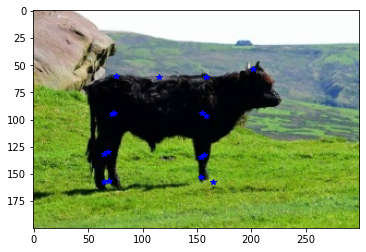

In [16]:
# Для тестирования на отдельных изображениях 

# Путь к изображению            СЮДА
test_image = cv2.imread("cow148.jpeg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

reshaped_test_imageI = cv2.resize(test_image, (300, 200))
reshaped_test_image = reshaped_test_imageI.reshape(1, *SHAPE)/255
reshaped_test_image = reshaped_test_image.astype('float32')

predictions = model.predict(reshaped_test_image)
xy_predictions = output_pipe.inverse_transform(predictions).reshape(y.shape[1]//2, 2)
plt.imshow(reshaped_test_imageI)


lameness = False
if xy_predictions[2][1]*1.05 < xy_predictions[1][1] and xy_predictions[2][1]*1.05 < xy_predictions[3][1]:
    lameness = True
    
for i, xy in enumerate(xy_predictions):
    if lameness and i in [1,2,3]:
        plt.plot(xy[0], xy[1], 'r*')
    else:
        plt.plot(xy[0], xy[1], 'b*')

In [ ]:
# Для тестирования на видеоизображениях + произведение записи

# Путь к видеофайлу       СЮДА
cap = cv2.VideoCapture('testdatas/cow.mp4')

if (cap.isOpened()== False): 
  print("Ошибка!")

out = cv2.VideoWriter('outputVideo.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 20, (300, 200))

while(cap.isOpened()):
  # Чтение видео файла кадр за кадром
  ret, frame = cap.read()
  if ret == True:

    # Обработка кадров через модель МО
    reshaped_test_imageI = cv2.resize(frame, (300,200))
    reshaped_test_image = reshaped_test_imageI.reshape(1, *SHAPE)/255
    predictions = model.predict(reshaped_test_image)
    xy_predictions = output_pipe.inverse_transform(predictions).reshape(y.shape[1]//2, 2)
    
    lameness = False
    if xy_predictions[2][1] < xy_predictions[1][1] and xy_predictions[2][1] < xy_predictions[3][1]:
        lameness = True
        
    for i, key_point in enumerate(xy_predictions):
        if lameness and i in [1,2,3]:
            cv2.drawMarker(reshaped_test_imageI, (int(key_point[0]), int(key_point[1])),(0,0,255), markerType=cv2.MARKER_STAR, 
            markerSize=5, thickness=2, line_type=cv2.LINE_AA)
        else:
            cv2.drawMarker(reshaped_test_imageI, (int(key_point[0]), int(key_point[1])),(255,0,0), markerType=cv2.MARKER_STAR, 
            markerSize=5, thickness=2, line_type=cv2.LINE_AA)
    
    cv2.imshow('Frame', reshaped_test_imageI)
    out.write(reshaped_test_imageI)
  
    # Нажми "Q" (НА АНГЛИЙСКОЙ РАСКЛАДКЕ КЛАВИАТУРЫ!) чтоб закрыть окно воспроизведения видео
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
    
  else: 
    break

cap.release()
out.release()
cv2.destroyAllWindows()